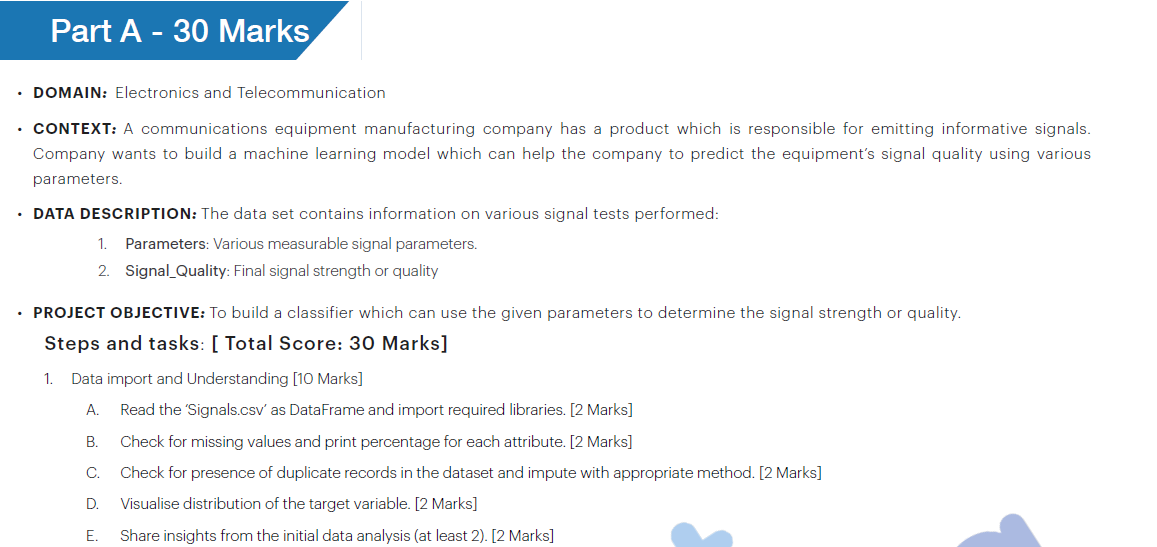

A. Read the ‘Signals.csv’ as DataFrame and import required libraries

In [29]:
# Importing required libraries
import numpy as np     
import pandas as pd

# Reading the CSV file with ";" as separators
df = pd.read_csv(r'C:\Users\arjit\Desktop\Neural Network\Project\NN Project Data - Signal.csv', sep=",")

In [30]:
# Display top 5 rows of the dataset
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


B. Check for missing values and print percentage for each attribute.

In [31]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()  # Counting the number of missing values in each column
total_values = df.shape[0]  # Total number of rows in the dataset

# Calculating the percentage of missing values for each attribute
missing_percentage = (missing_values / total_values) * 100  # Calculating the percentage of missing values

# Printing percentage of missing values for each attribute
print("Percentage of missing values for each attribute:")
print(missing_percentage)

Percentage of missing values for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [32]:
#Checking for duplicate records
duplicate_rows = df.duplicated()  # Checking for duplicate rows
num_duplicate_rows = sum(duplicate_rows)  # Counting the number of duplicate rows

if num_duplicate_rows > 0:
    print("Number of duplicate rows found:", num_duplicate_rows)
    # Remove duplicate rows
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

# Step 2: Impute missing values with an appropriate method
# Here, we'll use mean imputation as an example
df.fillna(df.mean(), inplace=True)  # Impute missing values with mean
print("Missing values imputed with mean.")


Number of duplicate rows found: 240
Duplicate rows removed.
Missing values imputed with mean.


D. Visualise distribution of the target variable

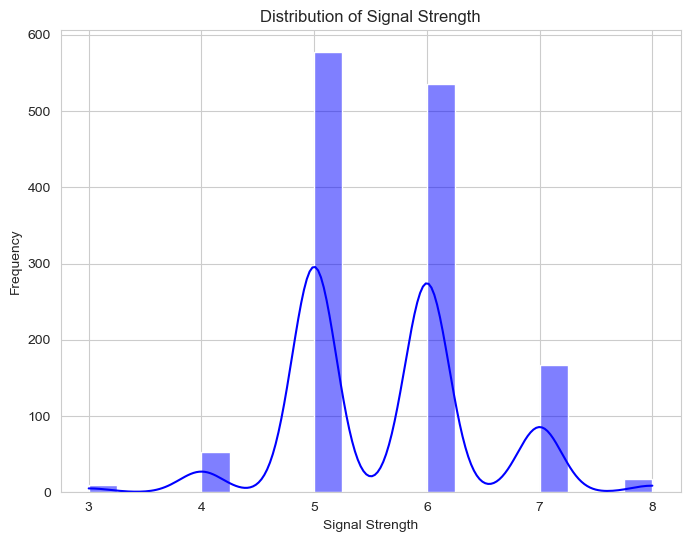

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the histogram of the target variable (Signal_Strength)
plt.figure(figsize=(8, 6))
sns.histplot(df['Signal_Strength'], bins=20, kde=True, color='blue')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.show()

The initial data analysis indicates that the dataset is complete, with no missing values in any parameters or the target variable 'Signal_Strength'. Duplicate rows were identified and removed to ensure data integrity. Insights into the frequency distribution of signal strengths reveal that signals 5 and 6 have the highest occurrence, with frequencies between 500 and 600, followed by signal 7 with a frequency between 100 and 200. This suggests varying levels of signal strength occurrence within the dataset, providing valuable guidance for further analysis and predictive modeling in the telecommunications equipment manufacturing domain.








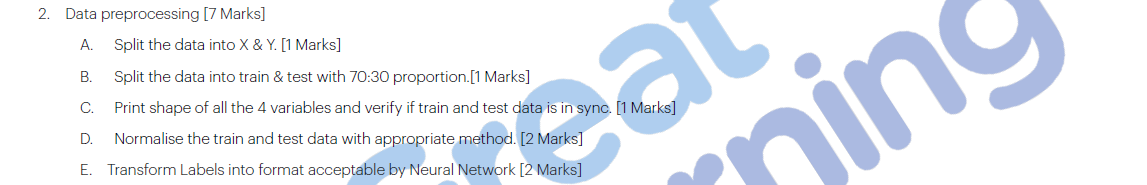


In [34]:
import sklearn
from sklearn.model_selection import train_test_split

#Defining the independent variables (X) by dropping the target variable 'Signal_Strength' from the dataset (df).
X = df.drop('Signal_Strength', axis=1)

# Defining the target variable (Y) as 'Signal_Strength' from the dataset (df)
Y = df['Signal_Strength']               

# Splitting the data into training and testing sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size=0.7, random_state=12)

Print shape of all the 4 variables and verify if train and test data is in sync

In [35]:
# Printing the shapes of the variables
print("Shape of X_Train:", X_Train.shape)
print("Shape of X_Test:", X_Test.shape)
print("Shape of Y_Train:", Y_Train.shape)
print("Shape of Y_Test:", Y_Test.shape)

# Verifying if train and test data are in sync
train_sync = X_Train.shape[0] == Y_Train.shape[0]
test_sync = X_Test.shape[0] == Y_Test.shape[0]

if train_sync and test_sync:
    print("Train and test data are in sync.")
else:
    print("Train and test data are not in sync.")

Shape of X_Train: (951, 11)
Shape of X_Test: (408, 11)
Shape of Y_Train: (951,)
Shape of Y_Test: (408,)
Train and test data are in sync.


In [36]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_Train_Normalized = scaler.fit_transform(X_Train)

# Transform the testing data using the same scaler
X_Test_Normalized = scaler.transform(X_Test)

Transform Labels into format acceptable by Neural Network

In [37]:
# Import the necessary function for one-hot encoding
from keras.utils import to_categorical

# Perform one-hot encoding for the training target variable
Y_Train = to_categorical(Y_Train)

# Perform one-hot encoding for the testing target variable
Y_Test = to_categorical(Y_Test)

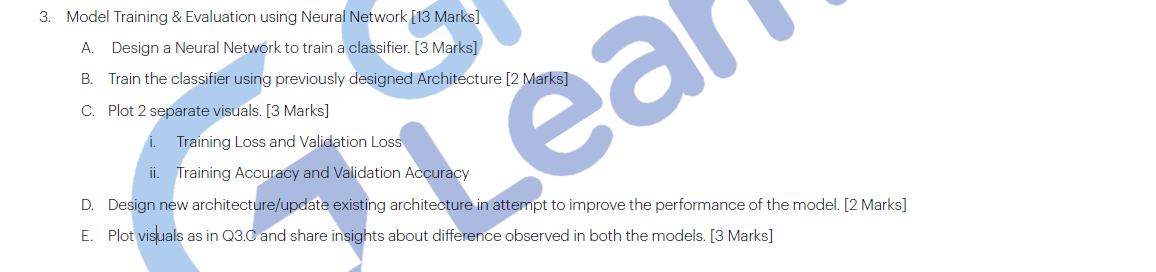

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU

# Defining the neural network model
NN_model_Classifier = Sequential()

# Adding the input layer with normal initialization and ReLU activation
NN_model_Classifier.add(Dense(128, kernel_initializer='normal', input_dim=X_Train.shape[1], activation='relu'))

# Adding hidden layers with normal initialization and LeakyReLU activation
NN_model_Classifier.add(Dense(64, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

# Adding the output layer with softmax activation for multi-class classification
num_classes = 9  # Adjusting based on the number of classes in your problem
NN_model_Classifier.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Compiling the model with categorical crossentropy loss and Adam optimizer
NN_model_Classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing the model summary
NN_model_Classifier.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16)               

In [39]:
Network_Classifier=NN_model_Classifier.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=400, batch_size=200)

Epoch 1/400


5/5 [==============================] - 2s 59ms/step - loss: 2.1941 - accuracy: 0.3428 - val_loss: 2.1888 - val_accuracy: 0.4240
Epoch 2/400
5/5 [==============================] - 0s 14ms/step - loss: 2.1846 - accuracy: 0.4248 - val_loss: 2.1775 - val_accuracy: 0.4240
Epoch 3/400
5/5 [==============================] - 0s 13ms/step - loss: 2.1711 - accuracy: 0.4248 - val_loss: 2.1595 - val_accuracy: 0.4240
Epoch 4/400
5/5 [==============================] - 0s 12ms/step - loss: 2.1482 - accuracy: 0.4248 - val_loss: 2.1261 - val_accuracy: 0.4240
Epoch 5/400
5/5 [==============================] - 0s 13ms/step - loss: 2.1037 - accuracy: 0.4248 - val_loss: 2.0599 - val_accuracy: 0.4240
Epoch 6/400
5/5 [==============================] - 0s 13ms/step - loss: 2.0160 - accuracy: 0.4248 - val_loss: 1.9322 - val_accuracy: 0.4240
Epoch 7/400
5/5 [==============================] - 0s 12ms/step - loss: 1.8538 - accuracy: 0.4248 - val_loss: 1.7178 - val_accuracy: 0.4240
Epoch 8/400
5/5 [=

Epoch 56/400
5/5 [==============================] - 0s 12ms/step - loss: 0.9020 - accuracy: 0.6109 - val_loss: 1.0034 - val_accuracy: 0.5858
Epoch 57/400
5/5 [==============================] - 0s 11ms/step - loss: 0.9000 - accuracy: 0.6057 - val_loss: 1.0029 - val_accuracy: 0.6029
Epoch 58/400
5/5 [==============================] - 0s 11ms/step - loss: 0.8965 - accuracy: 0.6130 - val_loss: 1.0039 - val_accuracy: 0.6029
Epoch 59/400
5/5 [==============================] - 0s 12ms/step - loss: 0.8938 - accuracy: 0.6162 - val_loss: 1.0034 - val_accuracy: 0.6103
Epoch 60/400
5/5 [==============================] - 0s 12ms/step - loss: 0.8916 - accuracy: 0.6172 - val_loss: 1.0022 - val_accuracy: 0.6005
Epoch 61/400
5/5 [==============================] - 0s 12ms/step - loss: 0.8905 - accuracy: 0.6130 - val_loss: 1.0033 - val_accuracy: 0.5956
Epoch 62/400
5/5 [==============================] - 0s 12ms/step - loss: 0.8885 - accuracy: 0.6151 - val_loss: 1.0048 - val_accuracy: 0.5956
Epoch 63/400


5/5 [==============================] - 0s 12ms/step - loss: 0.8141 - accuracy: 0.6351 - val_loss: 1.0322 - val_accuracy: 0.6250
Epoch 115/400
5/5 [==============================] - 0s 15ms/step - loss: 0.8147 - accuracy: 0.6393 - val_loss: 1.0379 - val_accuracy: 0.6176
Epoch 116/400
5/5 [==============================] - 0s 13ms/step - loss: 0.8162 - accuracy: 0.6383 - val_loss: 1.0363 - val_accuracy: 0.6078
Epoch 117/400
5/5 [==============================] - 0s 12ms/step - loss: 0.8085 - accuracy: 0.6393 - val_loss: 1.0461 - val_accuracy: 0.6029
Epoch 118/400
5/5 [==============================] - 0s 12ms/step - loss: 0.8092 - accuracy: 0.6383 - val_loss: 1.0384 - val_accuracy: 0.6152
Epoch 119/400
5/5 [==============================] - 0s 12ms/step - loss: 0.8074 - accuracy: 0.6372 - val_loss: 1.0457 - val_accuracy: 0.6005
Epoch 120/400
5/5 [==============================] - 0s 45ms/step - loss: 0.8037 - accuracy: 0.6383 - val_loss: 1.0408 - val_accuracy: 0.6176
Epoch 121/400
5/5 [=

Epoch 172/400
5/5 [==============================] - 0s 12ms/step - loss: 0.6575 - accuracy: 0.7150 - val_loss: 1.2525 - val_accuracy: 0.5833
Epoch 173/400
5/5 [==============================] - 0s 13ms/step - loss: 0.6555 - accuracy: 0.7108 - val_loss: 1.2933 - val_accuracy: 0.5760
Epoch 174/400
5/5 [==============================] - 0s 12ms/step - loss: 0.6519 - accuracy: 0.7224 - val_loss: 1.2654 - val_accuracy: 0.5833
Epoch 175/400
5/5 [==============================] - 0s 11ms/step - loss: 0.6577 - accuracy: 0.7066 - val_loss: 1.3191 - val_accuracy: 0.5613
Epoch 176/400
5/5 [==============================] - 0s 12ms/step - loss: 0.6503 - accuracy: 0.7203 - val_loss: 1.2967 - val_accuracy: 0.5760
Epoch 177/400
5/5 [==============================] - 0s 11ms/step - loss: 0.6392 - accuracy: 0.7245 - val_loss: 1.3161 - val_accuracy: 0.5686
Epoch 178/400
5/5 [==============================] - 0s 12ms/step - loss: 0.6391 - accuracy: 0.7361 - val_loss: 1.2882 - val_accuracy: 0.5833
Epoch 

Epoch 230/400
5/5 [==============================] - 0s 12ms/step - loss: 0.4718 - accuracy: 0.8097 - val_loss: 1.6657 - val_accuracy: 0.5466
Epoch 231/400
5/5 [==============================] - 0s 15ms/step - loss: 0.4715 - accuracy: 0.8107 - val_loss: 1.6682 - val_accuracy: 0.5319
Epoch 232/400
5/5 [==============================] - 0s 15ms/step - loss: 0.4764 - accuracy: 0.8065 - val_loss: 1.6709 - val_accuracy: 0.5441
Epoch 233/400
5/5 [==============================] - 0s 12ms/step - loss: 0.4747 - accuracy: 0.7981 - val_loss: 1.7024 - val_accuracy: 0.5417
Epoch 234/400
5/5 [==============================] - 0s 13ms/step - loss: 0.4658 - accuracy: 0.8149 - val_loss: 1.6855 - val_accuracy: 0.5613
Epoch 235/400
5/5 [==============================] - 0s 13ms/step - loss: 0.4568 - accuracy: 0.8160 - val_loss: 1.7202 - val_accuracy: 0.5466
Epoch 236/400
5/5 [==============================] - 0s 14ms/step - loss: 0.4560 - accuracy: 0.8202 - val_loss: 1.7621 - val_accuracy: 0.5343
Epoch 

Epoch 288/400
5/5 [==============================] - 0s 13ms/step - loss: 0.3862 - accuracy: 0.8549 - val_loss: 2.1832 - val_accuracy: 0.5368
Epoch 289/400
5/5 [==============================] - 0s 12ms/step - loss: 0.3840 - accuracy: 0.8412 - val_loss: 2.2184 - val_accuracy: 0.5123
Epoch 290/400
5/5 [==============================] - 0s 13ms/step - loss: 0.3521 - accuracy: 0.8675 - val_loss: 2.1939 - val_accuracy: 0.5196
Epoch 291/400
5/5 [==============================] - 0s 12ms/step - loss: 0.3512 - accuracy: 0.8623 - val_loss: 2.2250 - val_accuracy: 0.5221
Epoch 292/400
5/5 [==============================] - 0s 12ms/step - loss: 0.3325 - accuracy: 0.8770 - val_loss: 2.2152 - val_accuracy: 0.5196
Epoch 293/400
5/5 [==============================] - 0s 13ms/step - loss: 0.3320 - accuracy: 0.8717 - val_loss: 2.2068 - val_accuracy: 0.5319
Epoch 294/400
5/5 [==============================] - 0s 12ms/step - loss: 0.3267 - accuracy: 0.8770 - val_loss: 2.2673 - val_accuracy: 0.5049
Epoch 

Epoch 346/400
5/5 [==============================] - 0s 12ms/step - loss: 0.2401 - accuracy: 0.9222 - val_loss: 2.7802 - val_accuracy: 0.5294
Epoch 347/400
5/5 [==============================] - 0s 11ms/step - loss: 0.2611 - accuracy: 0.9064 - val_loss: 2.8361 - val_accuracy: 0.4951
Epoch 348/400
5/5 [==============================] - 0s 12ms/step - loss: 0.2533 - accuracy: 0.9138 - val_loss: 2.8822 - val_accuracy: 0.5123
Epoch 349/400
5/5 [==============================] - 0s 13ms/step - loss: 0.2624 - accuracy: 0.8991 - val_loss: 2.8784 - val_accuracy: 0.4804
Epoch 350/400
5/5 [==============================] - 0s 11ms/step - loss: 0.2490 - accuracy: 0.9096 - val_loss: 2.8013 - val_accuracy: 0.5294
Epoch 351/400
5/5 [==============================] - 0s 11ms/step - loss: 0.2332 - accuracy: 0.9232 - val_loss: 2.8353 - val_accuracy: 0.5245
Epoch 352/400
5/5 [==============================] - 0s 13ms/step - loss: 0.2413 - accuracy: 0.9127 - val_loss: 2.8344 - val_accuracy: 0.5000
Epoch 

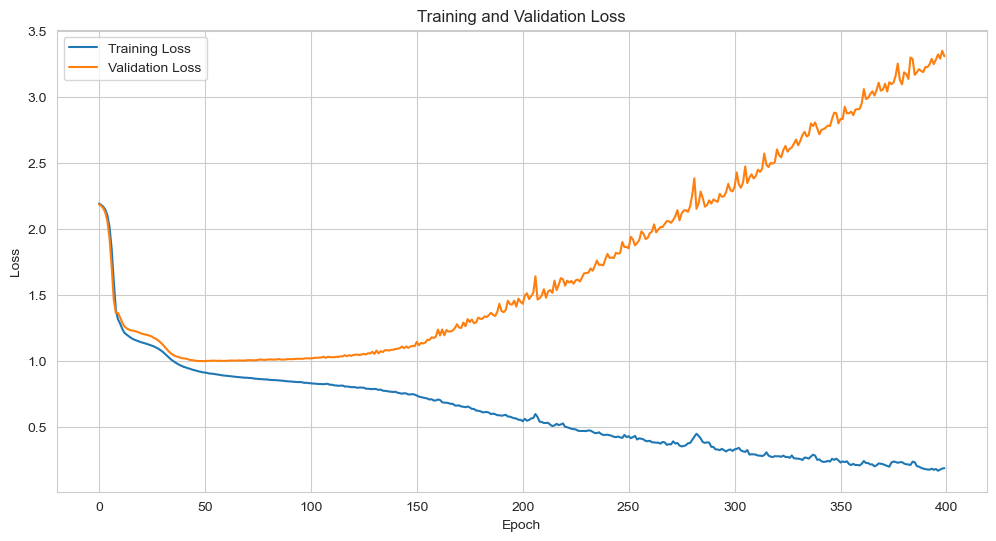

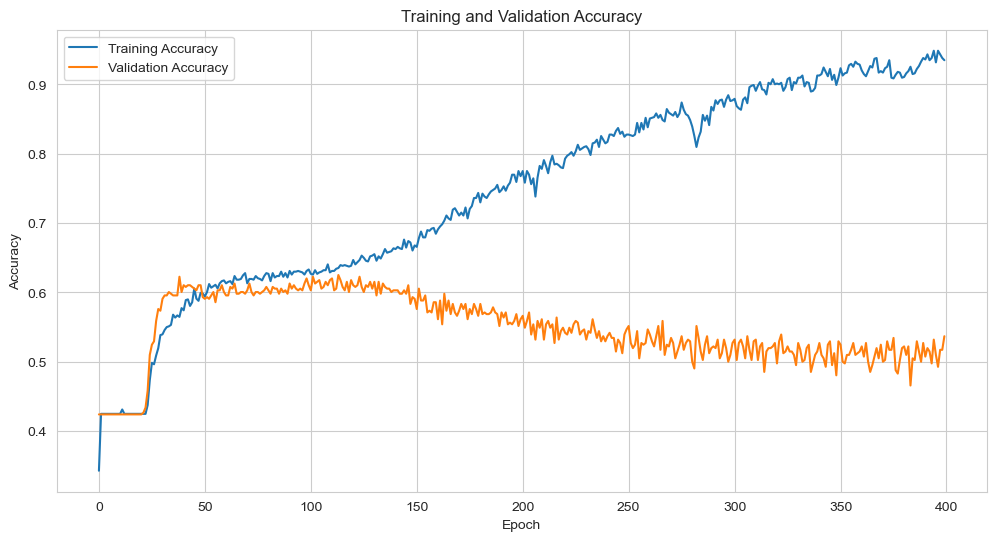

In [46]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(Network_Classifier.history['loss'], label='Training Loss')
plt.plot(Network_Classifier.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(Network_Classifier.history['accuracy'], label='Training Accuracy')
plt.plot(Network_Classifier.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [47]:
from keras.layers import Dropout

# Define the neural network model
updated_model = Sequential()

# Add the input layer with normal initialization and ReLU activation
updated_model.add(Dense(128, kernel_initializer='normal', input_dim=X_Train.shape[1], activation='relu'))
updated_model.add(Dropout(0.2))  # Add dropout with 20% dropout rate

# Add hidden layers with normal initialization and LeakyReLU activation
updated_model.add(Dense(64, kernel_initializer='normal'))
updated_model.add(LeakyReLU(alpha=0.1))
updated_model.add(Dropout(0.2))  # Add dropout with 20% dropout rate

updated_model.add(Dense(32, kernel_initializer='normal'))
updated_model.add(LeakyReLU(alpha=0.1))
updated_model.add(Dropout(0.2))  # Add dropout with 20% dropout rate

updated_model.add(Dense(16, kernel_initializer='normal'))
updated_model.add(LeakyReLU(alpha=0.1))
updated_model.add(Dropout(0.2))  # Add dropout with 20% dropout rate

# Add the output layer with softmax activation for multi-class classification
updated_model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
updated_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
updated_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1536      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 32)               

In [48]:
Network_Classifier2=updated_model.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=400, batch_size=200)

Epoch 1/400
5/5 [==============================] - 1s 54ms/step - loss: 2.1941 - accuracy: 0.3649 - val_loss: 2.1886 - val_accuracy: 0.5270
Epoch 2/400
5/5 [==============================] - 0s 15ms/step - loss: 2.1845 - accuracy: 0.4753 - val_loss: 2.1770 - val_accuracy: 0.4877
Epoch 3/400
5/5 [==============================] - 0s 14ms/step - loss: 2.1703 - accuracy: 0.4711 - val_loss: 2.1586 - val_accuracy: 0.4632
Epoch 4/400
5/5 [==============================] - 0s 14ms/step - loss: 2.1466 - accuracy: 0.4606 - val_loss: 2.1249 - val_accuracy: 0.4240
Epoch 5/400
5/5 [==============================] - 0s 15ms/step - loss: 2.1033 - accuracy: 0.4343 - val_loss: 2.0589 - val_accuracy: 0.4240
Epoch 6/400
5/5 [==============================] - 0s 16ms/step - loss: 2.0139 - accuracy: 0.4290 - val_loss: 1.9331 - val_accuracy: 0.4240
Epoch 7/400
5/5 [==============================] - 0s 15ms/step - loss: 1.8584 - accuracy: 0.4185 - val_loss: 1.7233 - val_accuracy: 0.4240
Epoch 8/400
5/5 [===

5/5 [==============================] - 0s 17ms/step - loss: 0.9750 - accuracy: 0.5773 - val_loss: 1.0065 - val_accuracy: 0.6127
Epoch 60/400
5/5 [==============================] - 0s 16ms/step - loss: 0.9769 - accuracy: 0.5920 - val_loss: 1.0067 - val_accuracy: 0.6078
Epoch 61/400
5/5 [==============================] - 0s 15ms/step - loss: 0.9833 - accuracy: 0.5868 - val_loss: 1.0069 - val_accuracy: 0.6250
Epoch 62/400
5/5 [==============================] - 0s 15ms/step - loss: 0.9720 - accuracy: 0.5752 - val_loss: 1.0048 - val_accuracy: 0.6152
Epoch 63/400
5/5 [==============================] - 0s 16ms/step - loss: 0.9765 - accuracy: 0.5857 - val_loss: 1.0013 - val_accuracy: 0.5956
Epoch 64/400
5/5 [==============================] - 0s 15ms/step - loss: 0.9605 - accuracy: 0.5973 - val_loss: 1.0011 - val_accuracy: 0.6029
Epoch 65/400
5/5 [==============================] - 0s 15ms/step - loss: 0.9752 - accuracy: 0.5920 - val_loss: 1.0026 - val_accuracy: 0.6176
Epoch 66/400
5/5 [========

5/5 [==============================] - 0s 14ms/step - loss: 0.8875 - accuracy: 0.6183 - val_loss: 1.0151 - val_accuracy: 0.6103
Epoch 118/400
5/5 [==============================] - 0s 14ms/step - loss: 0.8998 - accuracy: 0.6246 - val_loss: 1.0218 - val_accuracy: 0.6054
Epoch 119/400
5/5 [==============================] - 0s 21ms/step - loss: 0.9017 - accuracy: 0.6109 - val_loss: 1.0237 - val_accuracy: 0.6078
Epoch 120/400
5/5 [==============================] - 0s 16ms/step - loss: 0.9010 - accuracy: 0.6225 - val_loss: 1.0206 - val_accuracy: 0.6103
Epoch 121/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8947 - accuracy: 0.6246 - val_loss: 1.0177 - val_accuracy: 0.6103
Epoch 122/400
5/5 [==============================] - 0s 14ms/step - loss: 0.8952 - accuracy: 0.6078 - val_loss: 1.0133 - val_accuracy: 0.6103
Epoch 123/400
5/5 [==============================] - 0s 12ms/step - loss: 0.8572 - accuracy: 0.6393 - val_loss: 1.0123 - val_accuracy: 0.6103
Epoch 124/400
5/5 [=

Epoch 175/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8584 - accuracy: 0.6341 - val_loss: 1.0567 - val_accuracy: 0.6029
Epoch 176/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8602 - accuracy: 0.6351 - val_loss: 1.0491 - val_accuracy: 0.6103
Epoch 177/400
5/5 [==============================] - 0s 12ms/step - loss: 0.8670 - accuracy: 0.6172 - val_loss: 1.0512 - val_accuracy: 0.6152
Epoch 178/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8458 - accuracy: 0.6404 - val_loss: 1.0622 - val_accuracy: 0.5956
Epoch 179/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8450 - accuracy: 0.6414 - val_loss: 1.0600 - val_accuracy: 0.6103
Epoch 180/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8511 - accuracy: 0.6341 - val_loss: 1.0585 - val_accuracy: 0.6103
Epoch 181/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8585 - accuracy: 0.6425 - val_loss: 1.0597 - val_accuracy: 0.6029
Epoch 

Epoch 233/400
5/5 [==============================] - 0s 12ms/step - loss: 0.8263 - accuracy: 0.6372 - val_loss: 1.0944 - val_accuracy: 0.5907
Epoch 234/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8243 - accuracy: 0.6309 - val_loss: 1.0922 - val_accuracy: 0.5833
Epoch 235/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8202 - accuracy: 0.6562 - val_loss: 1.1035 - val_accuracy: 0.5809
Epoch 236/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8225 - accuracy: 0.6446 - val_loss: 1.1110 - val_accuracy: 0.5882
Epoch 237/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8124 - accuracy: 0.6593 - val_loss: 1.0977 - val_accuracy: 0.5980
Epoch 238/400
5/5 [==============================] - 0s 14ms/step - loss: 0.8057 - accuracy: 0.6625 - val_loss: 1.1076 - val_accuracy: 0.5833
Epoch 239/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8008 - accuracy: 0.6593 - val_loss: 1.1217 - val_accuracy: 0.5784
Epoch 

Epoch 291/400
5/5 [==============================] - 0s 11ms/step - loss: 0.7728 - accuracy: 0.6740 - val_loss: 1.1619 - val_accuracy: 0.5686
Epoch 292/400
5/5 [==============================] - 0s 14ms/step - loss: 0.7757 - accuracy: 0.6709 - val_loss: 1.1551 - val_accuracy: 0.5711
Epoch 293/400
5/5 [==============================] - 0s 16ms/step - loss: 0.8093 - accuracy: 0.6667 - val_loss: 1.1489 - val_accuracy: 0.5907
Epoch 294/400
5/5 [==============================] - 0s 17ms/step - loss: 0.7902 - accuracy: 0.6530 - val_loss: 1.1562 - val_accuracy: 0.5858
Epoch 295/400
5/5 [==============================] - 0s 17ms/step - loss: 0.7935 - accuracy: 0.6540 - val_loss: 1.1524 - val_accuracy: 0.5858
Epoch 296/400
5/5 [==============================] - 0s 13ms/step - loss: 0.7755 - accuracy: 0.6803 - val_loss: 1.1508 - val_accuracy: 0.5882
Epoch 297/400
5/5 [==============================] - 0s 12ms/step - loss: 0.7996 - accuracy: 0.6625 - val_loss: 1.1612 - val_accuracy: 0.5760
Epoch 

Epoch 349/400
5/5 [==============================] - 0s 16ms/step - loss: 0.7551 - accuracy: 0.6814 - val_loss: 1.2159 - val_accuracy: 0.5858
Epoch 350/400
5/5 [==============================] - 0s 15ms/step - loss: 0.7398 - accuracy: 0.6919 - val_loss: 1.2209 - val_accuracy: 0.5833
Epoch 351/400
5/5 [==============================] - 0s 14ms/step - loss: 0.7519 - accuracy: 0.6824 - val_loss: 1.2230 - val_accuracy: 0.5784
Epoch 352/400
5/5 [==============================] - 0s 14ms/step - loss: 0.7328 - accuracy: 0.6898 - val_loss: 1.2195 - val_accuracy: 0.5809
Epoch 353/400
5/5 [==============================] - 0s 16ms/step - loss: 0.7378 - accuracy: 0.6856 - val_loss: 1.2433 - val_accuracy: 0.5711
Epoch 354/400
5/5 [==============================] - 0s 17ms/step - loss: 0.7387 - accuracy: 0.6803 - val_loss: 1.2442 - val_accuracy: 0.5784
Epoch 355/400
5/5 [==============================] - 0s 17ms/step - loss: 0.7641 - accuracy: 0.6856 - val_loss: 1.2178 - val_accuracy: 0.5833
Epoch 

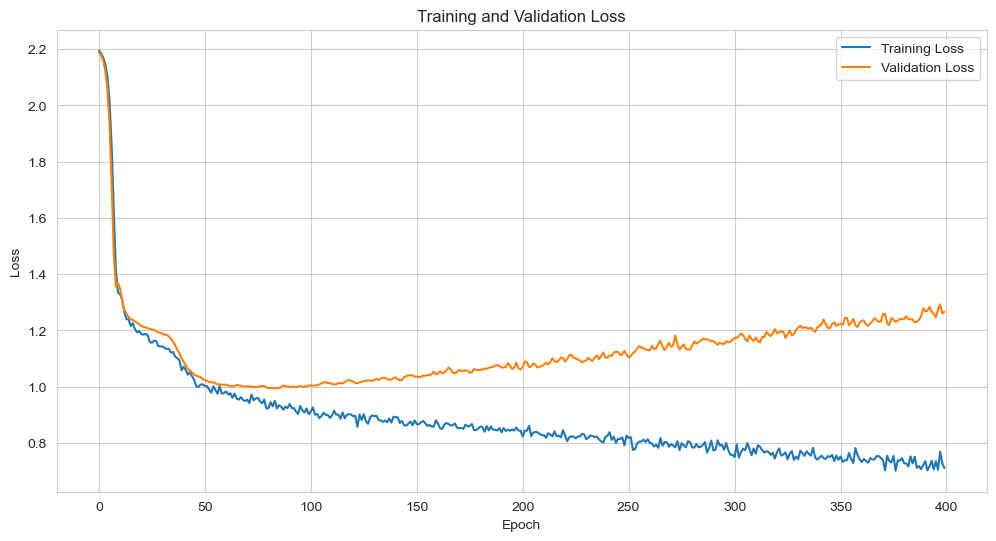

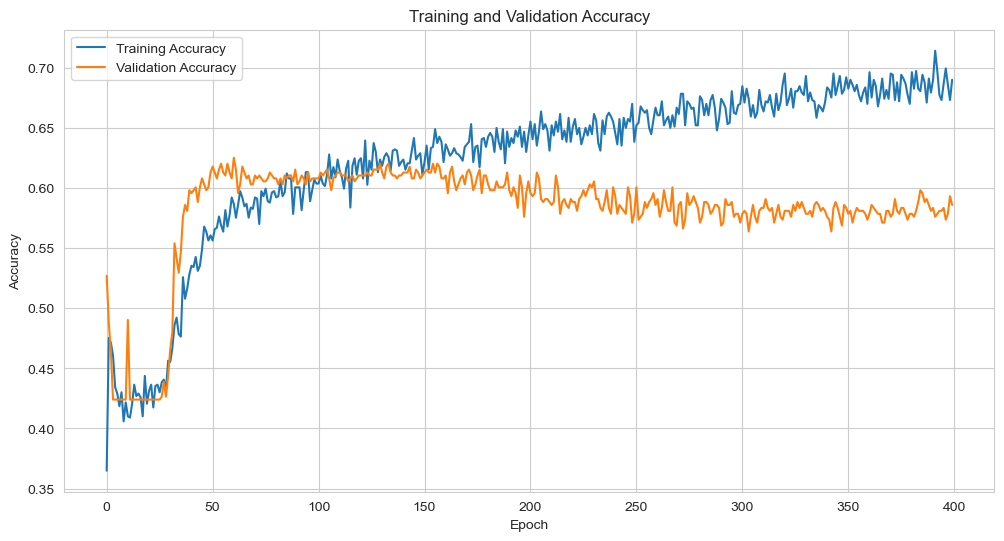

In [50]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(Network_Classifier2.history['loss'], label='Training Loss')
plt.plot(Network_Classifier2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(Network_Classifier2.history['accuracy'], label='Training Accuracy')
plt.plot(Network_Classifier2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The original model exhibited earlier divergence between training and validation loss, starting around epoch 40, while the updated model showed similar divergence but slightly later, around epoch 50-60. Despite both models reaching a loss of 1 around the same time, the gap between training and validation loss was narrower in the updated model, indicating improved generalization and less overfitting. In terms of accuracy, the original model demonstrated significant divergence between training and validation accuracy around epoch 130, with the gap widening over time. In contrast, the updated model showcased closer alignment between training and validation accuracy, even intersecting multiple times until around epoch 160, where the validation accuracy began to drop. Although both models experienced some overfitting, the updated model with dropout regularization exhibited better generalization performance and less severe divergence between training and validation metrics.

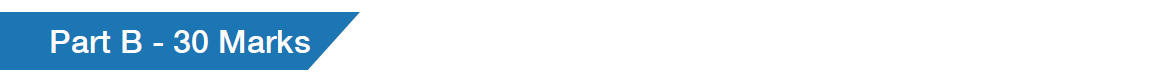

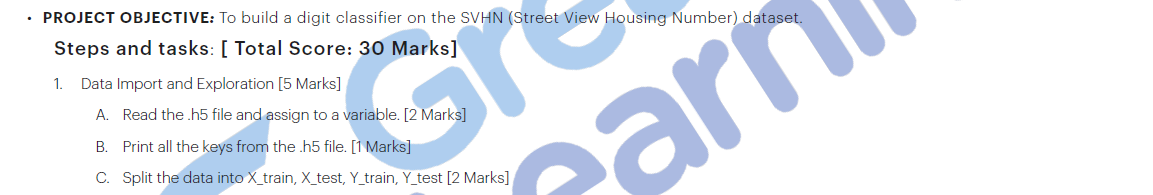

In [110]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [111]:
# Import the h5py library for working with HDF5 files
import h5py

# Open the HDF5 file in read-only mode using double backslashes in the file path
df2 = h5py.File('C:\\Users\\arjit\\Desktop\\Neural Network\\Project\\Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

# Print the keys present in the HDF5 file
print(df2.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [112]:
# Loading the training and testing data from the HDF5 file
X_train = df2['X_train'][:]
Y_train = df2['y_train'][:]
X_test = df2['X_test'][:]
Y_test = df2['y_test'][:]

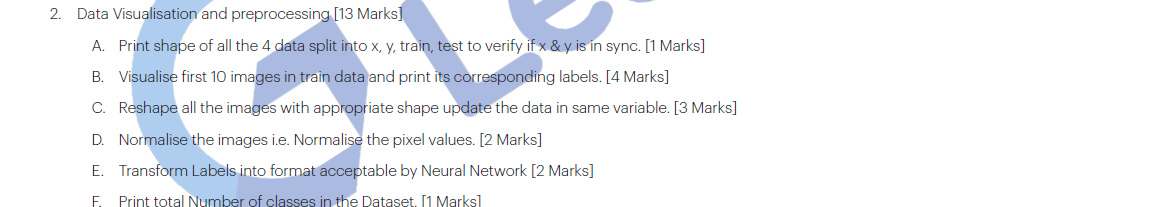

In [113]:
# Print the shape of X_train, Y_train, X_test, and Y_test
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (42000, 32, 32)
Shape of Y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of Y_test: (18000,)


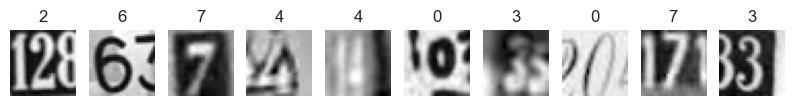

In [114]:
#Visualising the first 10 images in train data and print its corresponding labels
import matplotlib.pyplot as plt

# Defining a function to display images and their labels
def display_images(images, labels):
    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i], cmap='gray')  # Assuming images are grayscale
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Visualizing the first 10 images in the training data
display_images(X_train[:10], Y_train[:10])


In [115]:
# Reshaping the images in the training and testing sets to have a shape of (num_samples, 1024, 1)
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# Normalizing inputs from the range 0-255 to the range 0-1
# Rescaling pixel values to a smaller range helps the model learn better
X_train = X_train / 255.0
X_test = X_test / 255.0

# Printing the shapes of the resized training and testing sets
print('Resized Training set:', X_train.shape, Y_train.shape)
print('Resized Test set:', X_test.shape, Y_test.shape)

Resized Training set: (42000, 1024, 1) (42000,)
Resized Test set: (18000, 1024, 1) (18000,)


In [116]:
# Importing the necessary library
from keras.utils import to_categorical

# One-hot encode the target variables (labels)
# Converting the integer labels to one-hot encoded binary vectors
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [117]:
# Calculating the total number of classes in the dataset
num_classes = Y_test.shape[1]

# Printing the total number of classes
print("Total Number of Classes:", num_classes)

Total Number of Classes: 10


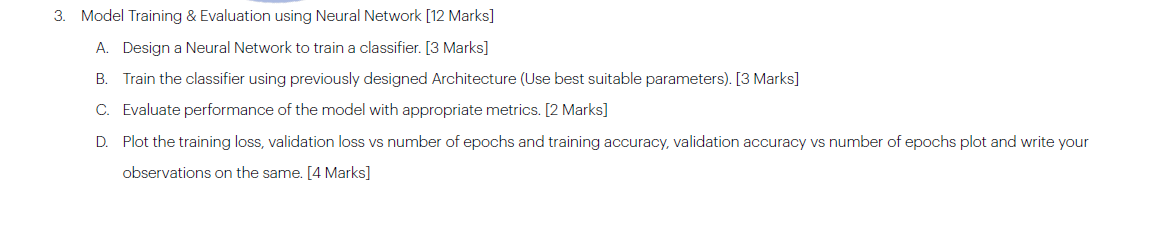

In [119]:
# Defining the neural network model
def nn_model3():
    # Create the model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Last layer configured correctly
    return model

# Building the model
model3 = nn_model3()

# Compile the model
sgd = optimizers.Adam(learning_rate=1e-3)
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

# Train the model
Network_Classifier3 = model3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 2s - loss: 2.3064 - accuracy: 0.0991 - val_loss: 2.3022 - val_accuracy: 0.1041 - 2s/epoch - 16ms/step
Epoch 2/100
140/140 - 1s - loss: 2.3011 - accuracy: 0.1100 - val_loss: 2.2882 - val_accuracy: 0.1438 - 1s/epoch - 8ms/step
Epoch 3/100
140/140 - 1s - loss: 2.1711 - accuracy: 0.1935 - val_loss: 2.0514 - val_accuracy: 0.2666 - 1s/epoch - 8ms/step
Epoch 4/100
140/140 - 1s - loss: 1.8942 - accuracy: 0.3346 - val_loss: 1.6552 - val_accuracy: 0.4345 - 1s/epoch - 8ms/step
Epoch 5/100
140/140 - 1s - loss: 1.5643 - accuracy: 0.4610 - val_loss: 1.5050 - val_accuracy: 0.4926 - 1s/epoch - 9ms/step
Epoch 6/100
140/140 - 1s - loss: 1.4304 - accuracy: 0.5183 - val_loss: 1.4011 - val_accuracy: 0.5242 - 1s/epoch - 9ms/step
Epoch 7/100
140/140 - 1s - loss: 1.3377 - accuracy: 0.5535 - val_loss: 1.3087 - val_accuracy: 0.5647 - 1s/epoch - 9ms/step
Epoch 8/100
140/140 - 1s - loss: 1.2775 - accuracy: 0.5801 - val_loss: 1.2492 - val_accuracy: 0.5987 - 1s/epoch - 8ms/step
Epoch 9/100
140

Epoch 68/100
140/140 - 1s - loss: 0.5574 - accuracy: 0.8277 - val_loss: 0.7084 - val_accuracy: 0.7947 - 1s/epoch - 10ms/step
Epoch 69/100
140/140 - 1s - loss: 0.5418 - accuracy: 0.8341 - val_loss: 0.6713 - val_accuracy: 0.8073 - 1s/epoch - 10ms/step
Epoch 70/100
140/140 - 1s - loss: 0.5380 - accuracy: 0.8343 - val_loss: 0.6933 - val_accuracy: 0.7987 - 1s/epoch - 10ms/step
Epoch 71/100
140/140 - 1s - loss: 0.5301 - accuracy: 0.8371 - val_loss: 0.7035 - val_accuracy: 0.7963 - 1s/epoch - 10ms/step
Epoch 72/100
140/140 - 2s - loss: 0.5350 - accuracy: 0.8337 - val_loss: 0.6872 - val_accuracy: 0.8012 - 2s/epoch - 11ms/step
Epoch 73/100
140/140 - 1s - loss: 0.5352 - accuracy: 0.8346 - val_loss: 0.6778 - val_accuracy: 0.8038 - 1s/epoch - 11ms/step
Epoch 74/100
140/140 - 1s - loss: 0.5273 - accuracy: 0.8367 - val_loss: 0.7053 - val_accuracy: 0.7962 - 1s/epoch - 9ms/step
Epoch 75/100
140/140 - 1s - loss: 0.5239 - accuracy: 0.8376 - val_loss: 0.6775 - val_accuracy: 0.8028 - 1s/epoch - 8ms/step
Ep

In [121]:
# Final evaluation of the model
scores = model3.evaluate(X_test, Y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6819582581520081
Accuracy: 0.8075000047683716


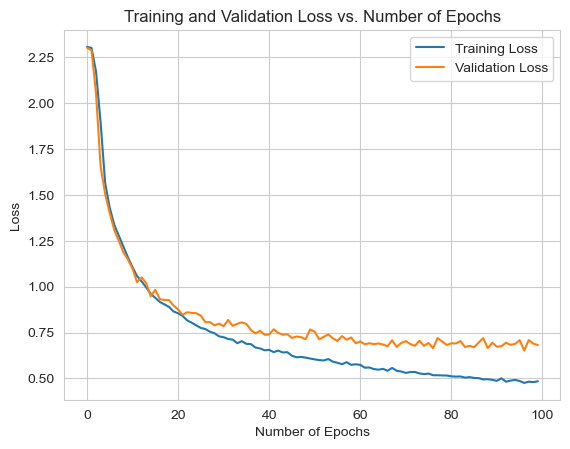

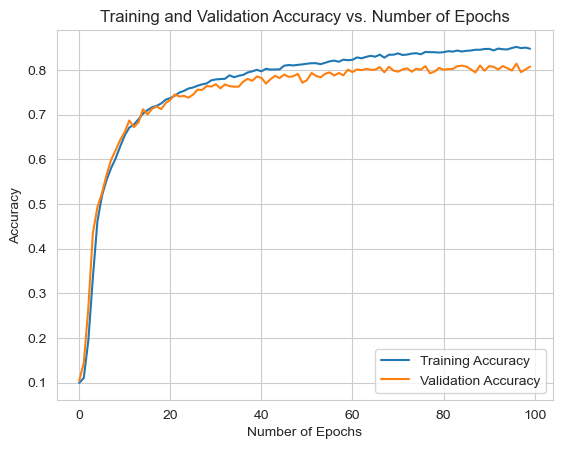

In [122]:
import matplotlib.pyplot as plt

# Plotting the training loss vs. number of epochs
plt.plot(Network_Classifier3.history['loss'], label='Training Loss')
plt.plot(Network_Classifier3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training accuracy vs. number of epochs
plt.plot(Network_Classifier3.history['accuracy'], label='Training Accuracy')
plt.plot(Network_Classifier3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The training and validation loss graphs exhibit an initial decline in both metrics, indicating effective learning by the model. However, around epoch 22, we notice a significant gap emerging between the two lines, suggesting possible overfitting. This discrepancy implies that while the model continues to improve its performance on the training data, it struggles to generalize well to unseen validation data, potentially due to overly complex modeling or insufficient regularization.

Similarly, the training and validation accuracy graphs depict a parallel increase in performance initially, reflecting the model's learning progress. Yet, after approximately 30 epochs, a noticeable divergence occurs between the two lines. This divergence indicates that while the model excels at classifying the training data, its accuracy on validation data plateaus or even deteriorates, reinforcing the suspicion of overfitting.

The final evaluation metrics of a loss of 0.682 and an accuracy of 0.808 demonstrate satisfactory performance on the test set. However, the observed overfitting in the later epochs suggests room for improvement. Incorporating regularization techniques like dropout or early stopping could potentially enhance the model's ability to generalize and mitigate the effects of overfitting, thereby improving overall performance.